Integration using a weight function:

$\int_0^{\infty} \frac{1}{1+x^2} = \frac{\pi}{4}$

In [1]:
import random

random.seed(13)
print(random.random())



0.2590084917154736


In [2]:
print(random.random())

0.6852579929645369


In [3]:
trials = [];

for i in range(100):
    random.seed(i)
    trials.append(random.random())

In [4]:
import numpy as np
import matplotlib.pyplot as plt



In [5]:
exact = 0.78540


def func(x):
    return 1.0/(1.0+x**2)



In [6]:
N = 100;

sumF = 0;
sumF2 = 0;

for i in range(N):
    FX = func(random.random())
    sumF = sumF + FX;
    sumF2 = sumF2 + FX**2

In [7]:
Favg = sumF/N
F2avg = sumF2/N
sigma = np.sqrt((F2avg-Favg**2)/N)

In [8]:
Favg

0.8016207868126654

In [9]:
sigma

0.01615854459044035

In [10]:
def w(x):
    return (4-2*x)/3



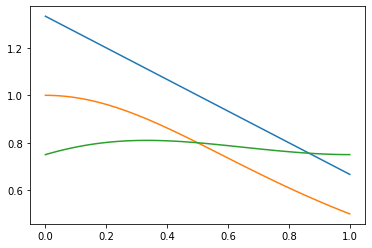

In [11]:
x = np.linspace(0,1,100)
plt.plot(x,w(x))
plt.plot(x,func(x))
plt.plot(x,func(x)/w(x))

In [12]:
def xinv(x):
    return 2 - np.sqrt(4-3*x) 

In [13]:
N = 100;

sumF = 0;
sumF2 = 0;

for i in range(N):
    y = random.random()
    x = xinv(y);
    
    FX = func(x)/w(x);
    
    sumF = sumF + FX;
    sumF2 = sumF2 + FX**2

In [14]:
Favg = sumF/N
F2avg = sumF2/N
sigma = np.sqrt((F2avg-Favg**2)/N)

In [15]:
Favg

0.7869544938921739

In [16]:
sigma

0.001926783448027644

In [17]:
xlist=[]
for i in range(1000):
    y = random.random()
    x = -np.log(1-y)
    xlist.append(x)
    


(array([0.75928546, 0.34850016, 0.17350859, 0.09935962, 0.05190428,
        0.02521065, 0.01334681, 0.00444894, 0.00444894, 0.00296596]),
 array([1.11009059e-04, 6.74429203e-01, 1.34874740e+00, 2.02306559e+00,
        2.69738379e+00, 3.37170198e+00, 4.04602018e+00, 4.72033837e+00,
        5.39465656e+00, 6.06897476e+00, 6.74329295e+00]),
 <BarContainer object of 10 artists>)

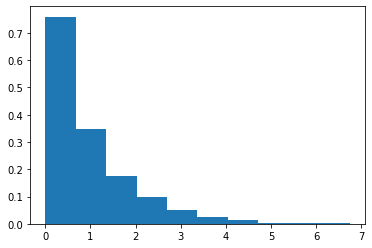

In [18]:
plt.hist(xlist,density=True)


In [19]:
def weight(x):
    return (6/5)*(1-x**2/2)

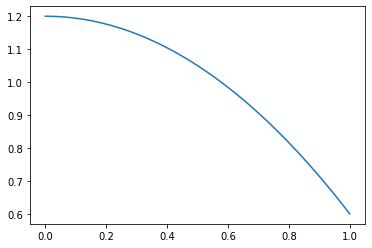

In [20]:
x = np.linspace(0,1,100)
plt.plot(x,weight(x))

In [21]:
def randomvariate(pdf,n=1000,xmin=0,xmax=1):  
  
  # Calculates the minimal and maximum values of the PDF in the desired  
  # interval. The rejection method needs these values in order to work  
  # properly.  
    x=np.linspace(xmin,xmax,1000)  
    y=pdf(x)  
    pmin=0.  
    pmax=y.max()  
   
    # Counters  
    naccept=0  
    ntrial=0  
   
  # Keeps generating numbers until we achieve the desired n  
    ran=[] # output list of random numbers  
    while naccept<n:  
        
        x=np.random.uniform(xmin,xmax) # x'  
        y=np.random.uniform(pmin,pmax) # y'  
   
        if y<pdf(x):  
            ran.append(x)  
            naccept=naccept+1  
            ntrial=ntrial+1  
    
    ran=np.asarray(ran)  
    
    return ran,ntrial  

In [22]:
ran,n=randomvariate(weight,5000);

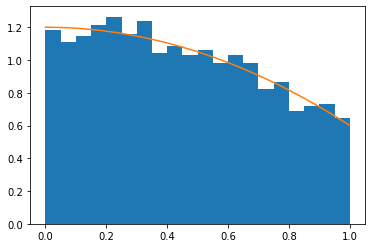

In [23]:
plt.hist(ran,bins=20,density=True)
plt.plot(x,weight(x))

In [24]:
2*np.random.random()-1

-0.32235443354378024

In [25]:
np.random.uniform(0,1)

0.13628005686522016

In [26]:
#Metropolis-Hastings ALgorithm


def Weight(x):
    return np.exp(-x**2/2);



def metropstep(xn,Weight,delta):
    
    xt = xn + delta;
    
    r = Weight(xt)/Weight(xn);
    
    if r>1:
        xnext = xt;
    else:
        eta = np.random.uniform(0,1);
        
        if eta<r:
            xnext = xt;
        else:
            xnext = xn;
            
    return xnext



In [27]:
metropstep(0,Weight,0.01)

0.01

In [28]:


x0 = 0;
Xchain = [x0];
nsteps = 1000;

for i in range(nsteps):
    xn1 = metropstep(Xchain[i],Weight,0.1)
    Xchain.append(xn1)
    
    


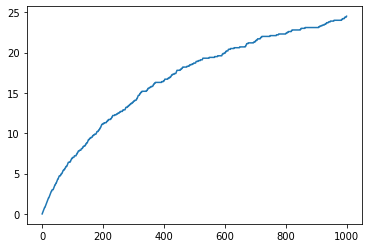

In [29]:
plt.plot(Xchain)

In [30]:
np.random.rand()

0.6501840748219172

In [31]:
def metropolis_hastings(p, iter=2000):
    x = 0.0
    samples = np.zeros(iter)

    for i in range(iter):
        
        x_t = np.array([x]) + np.random.normal(size=1)
        if np.random.rand() < p(x_t) / p(x):
            x = x_t
            
        samples[i] = np.array([x])

    return samples

In [32]:
sample = metropolis_hastings(Weight)

(array([  1.,   7.,  43., 189., 339., 491., 471., 289., 132.,  38.]),
 array([-3.85410274, -3.21535522, -2.5766077 , -1.93786019, -1.29911267,
        -0.66036515, -0.02161763,  0.61712989,  1.2558774 ,  1.89462492,
         2.53337244]),
 <BarContainer object of 10 artists>)

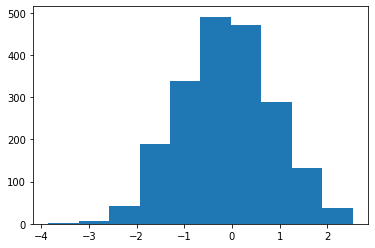

In [33]:
plt.hist(sample)

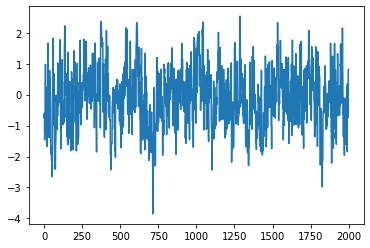

In [34]:
plt.plot(sample)

In [65]:
def func(x):
    return x**2

def fifik(x,N,k):
    sum = 0
    for i in range(N-k):
        sum = sum + func(x[i])*func(x[i+k])
    
    return sum/(N-k)

def C(x,N,k):
    
    fav = np.mean(func(x))
    favsq = np.mean(func(x)**2)
    
    return (fifik(x,N,k) - fav**2) / (favsq - fav**2)

In [68]:
np.size(sample)

2000

In [75]:
steps = np.arange(1,200)
Clist = []

for k in steps:
    Clist.append(C(sample,2000,k))
    


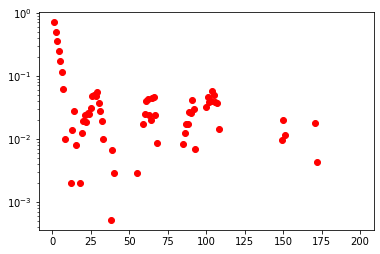

In [80]:
plt.semilogy(steps,Clist,"ro")

In [35]:
sample[0]

-0.6675908113773722

In [36]:
np.sum(Weight(sample))

1414.3227107523285

In [37]:
def func(x):
    return x*np.exp(x)

def monte_carlo(n_sample, mu, sigma):
    val_lst = []
    for _ in range(n_sample):
        x = np.random.normal(mu, sigma)
        val_lst.append(func(x))
    return np.mean(val_lst)

/home/pranav/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/pranav/.local/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


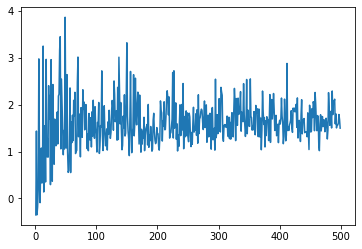

In [38]:
MAX_SAMPLE = 500 # Adjust this value as you need
x = np.arange(MAX_SAMPLE)
y = [monte_carlo(i, 0, 1) for i in x]
plt.plot(x, y)
plt.show()

In [39]:
y[499]*np.sqrt(2*np.pi)

3.7563878025603064